In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt


In [2]:
#число бросков
L = 300

#матрицы переходов и эмиссий
w = float(1 / 6)
a = np.array([[0.95, 0.05], [0.1, 0.9]], float)
e = np.array([[w, w, w, w, w, w], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]], float)

#начальное статическое распределение: px - четная кость, py - нечестная, a - матрица распределения
#qA = q
#(x, y)(a) = (x, y)
#x + y = 1
#получаем систему уравнений:
#0.5x + 0.05y = x
#x + y = 1
#P(x, y) = np.array([2/3], [1/3])

In [3]:
#случайная последовательность при заданных параметрах E и A
def HMM(e, a, L):
    path = []
    s = []
    if random.random() < (2 / 3):
        D = 1
        s.append(1)
        path.append(random.randint(1, 6))
    else:
        D = 0
        s.append(0)
        if random.random() < 0.5:
            path.append(6)
        else:
            path.append(random.randint(1, 5))
    for i in range(L - 1):
        X = random.random()
        K = random.random()
        if (D == 1) and (X < 0.05):
            D = 0
        elif (D == 1) and (X >= 0.05):
            D = 1
        elif (D == 0) and (X < 0.1):
            D = 1
        elif (D == 0) and (X >= 0.1):
            D = 0   
        if D == 1:
            s.append(1)
            path.append(random.randint(1, 6))
        elif D == 0:
            s.append(0)
            if K < 0.5:
                path.append(6)
            else:
                path.append(random.randint(1, 5))
    return(path, s)

path, s = HMM(e, a, L)

#наблюдение:
print(path)

#состояние:
print(s)

[6, 2, 6, 2, 6, 2, 2, 3, 3, 1, 2, 5, 3, 6, 1, 4, 3, 3, 2, 6, 3, 4, 4, 6, 4, 2, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 1, 2, 6, 6, 4, 5, 3, 1, 2, 1, 2, 2, 5, 3, 6, 1, 2, 3, 3, 6, 4, 1, 6, 1, 4, 5, 4, 5, 6, 6, 4, 5, 6, 1, 1, 5, 3, 3, 4, 6, 6, 2, 6, 6, 1, 6, 6, 4, 5, 6, 6, 6, 6, 4, 5, 6, 6, 5, 2, 5, 2, 5, 3, 4, 2, 4, 6, 1, 3, 6, 3, 6, 5, 2, 5, 6, 5, 4, 3, 2, 1, 3, 5, 4, 4, 3, 6, 4, 2, 5, 3, 4, 4, 4, 6, 6, 2, 6, 2, 6, 6, 2, 1, 5, 3, 5, 2, 5, 6, 3, 6, 6, 3, 6, 6, 6, 6, 6, 6, 3, 5, 1, 2, 3, 6, 6, 1, 6, 5, 6, 4, 4, 5, 6, 2, 6, 6, 4, 2, 4, 4, 2, 6, 6, 6, 6, 1, 6, 1, 3, 5, 1, 2, 4, 2, 2, 3, 1, 4, 1, 5, 4, 4, 1, 5, 6, 6, 1, 2, 5, 2, 5, 1, 6, 1, 5, 3, 3, 2, 6, 1, 1, 6, 6, 6, 5, 6, 5, 3, 6, 6, 2, 6, 6, 5, 6, 4, 4, 6, 6, 1, 6, 4, 2, 6, 4, 2, 6, 1, 3, 4, 3, 3, 4, 6, 6, 1, 6, 1, 3, 6, 2, 1, 1, 4, 4, 2, 1, 2, 1, 5, 2, 1, 5, 2, 1, 3, 5, 2, 2, 1, 4, 2, 6, 6, 1, 3, 5, 6, 2, 5, 3, 2, 3, 1, 6, 3, 1, 6, 6, 6, 6, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [4]:
#Алгоритм Витерби
#Инициализация:
Vk = [[0]*L, [0]*L]
Pv = [[0]*(L - 1), [0]*(L - 1)]
Vk[0][0] = e[0][path[0] - 1]*(2 / 3)
Vk[1][0] = e[1][path[0] - 1]*(1 / 3)
#Рекурсия:
for i in range(1, L):
    Vk[0][i] = e[0][path[i] - 1]*max(Vk[0][i - 1]*a[0][0], Vk[1][i - 1]*a[1][0])
    Vk[1][i] = e[1][path[i] - 1]*max(Vk[1][i - 1]*a[1][1], Vk[0][i - 1]*a[0][1])
    if Vk[0][i - 1]*a[0][0] > Vk[1][i - 1]*a[1][1]:
        Pv[0][i - 1] = 1
    else:
        Pv[0][i - 1] = 0
    if Vk[1][i - 1]*a[1][0] > Vk[0][i - 1]*a[0][1]:
        Pv[1][i - 1] = 0
    else:
        Pv[1][i - 1] = 1

#Нахождение наиболее вероятной траектории:
piv = [0]*L
if Vk[0][L - 1] > Vk[1][L - 1]:
    piv[L - 1] = 1
else:
    piv[L - 1] = 0
for i in range(L - 1):
    piv[L - (i + 2)] = Pv[piv[L - (i + 1)]][L - (i + 2)]
#Наиболее вероятная траектория:
print(piv)



[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


0.68


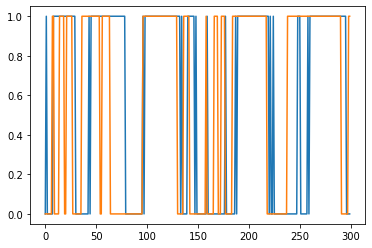

In [5]:
eq = 0
for i in range(L):
    if s[i] == piv[i]:
        eq = eq + 1
print(eq / L)

plt.plot(piv)
plt.plot(s)
plt.show()

In [6]:
#Алоритм просмотра вперед
def forward(e, a, path, L):
    fk = [[0]*(L), [0]*(L)]
    fk[0][0] = 2 / 3
    fk[1][0] = 1 / 3
    fk[0][1] = e[0][path[0]-1]*fk[0][0]
    fk[1][1] = e[1][path[0]-1]*fk[1][0]
    for i in range(2, L):
        fk[0][i] = e[0][path[i-1]-1]*(fk[0][i-1]*a[0][0] + fk[1][i-1]*a[1][0])
        fk[1][i] = e[1][path[i-1]-1]*(fk[1][i-1]*a[1][1] + fk[0][i-1]*a[0][1])
    return(fk)


fk = forward(e,a, path, L)
resf = fk[0][-1] + fk[1][-1]

#состояние 0 - честная кость:
print(fk[0])

#состояние 1 - нечестная кость:
print(fk[1])

#проверка
print(resf)

[0.6666666666666666, 0.1111111111111111, 0.020370370370370365, 0.003484567901234567, 0.0006768775720164607, 0.0001187265517832647, 2.4279824316986732e-05, 4.347530221788788e-06, 7.35672493920237e-07, 1.211019911815177e-07, 1.965163414620687e-08, 3.164544271236538e-09, 5.074636769524762e-10, 8.118910260068064e-11, 1.297289172234228e-11, 2.1409476968766746e-12, 3.478860453245252e-13, 5.606160888317087e-14, 8.993580563889992e-15, 1.4391997141877607e-15, 2.2999220436818564e-16, 3.79686112356799e-17, 6.1706488949778785e-18, 9.944891497473746e-19, 1.595472795084114e-19, 2.6614946927177908e-20, 4.349125360546685e-21, 7.029877164007397e-22, 1.1958781443839317e-22, 2.2954290538303454e-23, 4.006154779134788e-24, 8.111485775105012e-25, 2.0967942113017413e-25, 7.009862361386208e-26, 2.779103703504543e-26, 1.1940895023670741e-26, 5.2955126827506496e-27, 2.3756234844966342e-27, 5.149267356443633e-28, 9.42188066546479e-29, 2.0842463606768407e-29, 6.0053332227465544e-30, 1.196056182552842e-30, 2.11945

In [7]:
#Алоритм просмотра назад
def backward(e, a, path, L):
    bk = [[0]*(L), [0]*(L)]
    bk[0][-1] = 1
    bk[1][-1] = 1
    for i in range(L-2,-1,-1):
        bk[0][i] = (e[0][path[i]-1]*bk[0][i+1]*a[0][0] + e[1][path[i]-1]*bk[1][i+1]*a[0][1])
        bk[1][i] = (e[1][path[i]-1]*bk[1][i+1]*a[1][1] + e[0][path[i]-1]*bk[0][i+1]*a[1][0])
    return(bk)


bk = backward(e,a, path, L)

print(bk[0])
print(bk[1])

#проверка
resb = bk[0][0]*(2/3) + bk[1][0]*(1/3)
print(resb)

[3.374410436394428e-222, 1.8630499030620324e-221, 1.1236437374917087e-220, 6.545873259122665e-220, 4.035429404905288e-219, 2.4532539503944475e-218, 1.5372045355286024e-217, 9.629204561187637e-217, 6.028573627056429e-216, 3.7706493736488193e-215, 2.3542628123563333e-214, 1.4652493720254648e-213, 9.06663384593109e-213, 5.550339056805334e-212, 3.3294410436250515e-211, 2.0758250294466444e-210, 1.2886054914123167e-209, 7.935613700427825e-209, 4.8146252531335974e-208, 2.838145184602782e-207, 1.5765425566799844e-206, 9.53292522616535e-206, 5.582121466948783e-205, 3.056006882417031e-204, 1.416679264273066e-203, 7.852412200344642e-203, 3.764727756323671e-202, 1.0564671020182165e-201, 3.758278278993619e-201, 1.7362148485217435e-200, 3.905801845896781e-200, 9.032676815041862e-200, 2.243402188122849e-199, 6.514851523819486e-199, 2.4279517489891837e-198, 1.1654383457691364e-197, 6.581362147444324e-197, 4.0069039443663444e-196, 2.378199516046187e-195, 1.3404410732811906e-194, 8.154565194937961e-194,

In [8]:
#еще одна проверка
for i in range(L):
    print(fk[0][i]*bk[0][i] + fk[1][i]*bk[1][i])


4.9005982692658813e-222
4.900598269265881e-222
4.9005982692658813e-222
4.9005982692658813e-222
4.9005982692658813e-222
4.9005982692658813e-222
4.900598269265881e-222
4.90059826926588e-222
4.90059826926588e-222
4.90059826926588e-222
4.90059826926588e-222
4.9005982692658795e-222
4.9005982692658795e-222
4.900598269265879e-222
4.9005982692658795e-222
4.9005982692658795e-222
4.900598269265879e-222
4.900598269265881e-222
4.90059826926588e-222
4.900598269265881e-222
4.9005982692658795e-222
4.9005982692658795e-222
4.900598269265879e-222
4.900598269265879e-222
4.900598269265879e-222
4.900598269265879e-222
4.900598269265879e-222
4.900598269265878e-222
4.900598269265878e-222
4.900598269265879e-222
4.900598269265879e-222
4.900598269265878e-222
4.9005982692658777e-222
4.9005982692658777e-222
4.9005982692658777e-222
4.9005982692658777e-222
4.9005982692658777e-222
4.900598269265877e-222
4.900598269265878e-222
4.900598269265879e-222
4.900598269265878e-222
4.900598269265879e-222
4.900598269265878e-222


[0.4590474129872476, 0.42240872116146777, 0.46706622006953746, 0.4654439844077539, 0.5573792234239403, 0.594348620668793, 0.7616020332860447, 0.8542479007939758, 0.9050029305223487, 0.9317906143419079, 0.9440706813818742, 0.9461796808067535, 0.9388623788840377, 0.9195347636994495, 0.8813715342829029, 0.9068755632929087, 0.9147615122878695, 0.907814203648163, 0.8835802838718055, 0.8335018530534607, 0.7398943516041399, 0.7385872335650546, 0.7028797254752281, 0.62016217594843, 0.4612239366125493, 0.4264612655013738, 0.3341076346385367, 0.15154953634090657, 0.09171212589589807, 0.08132390757231926, 0.03192925816716018, 0.01495091527004695, 0.00959873154912229, 0.009318905565724527, 0.013768787659791112, 0.02839730208180162, 0.071117208158316, 0.19423944970263463, 0.24988755376843308, 0.25771293906600595, 0.3468173046756908, 0.6263098198587584, 0.7817402115970377, 0.8679967417573208, 0.9155398046177781, 0.9411586268865836, 0.9539001691335638, 0.9582639446110348, 0.9557909650121197, 0.945607

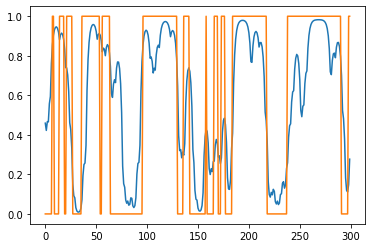

In [9]:
#Апостериорное дешифрование
def aposter(fkk, bkk, L):
    apstr = [0]*(L)
    for i in range(L):
        apstr[i] = (fkk[0][i]*bkk[0][i])/(fkk[0][-1] + fkk[1][-1])
    return(apstr)


apstr = aposter(fk, bk, L)
print(apstr)
plt.plot(apstr)
plt.plot(s)
plt.show()

In [10]:
#Обучение Баума-Уэлша:
#Введем случаные нормированные матрицы переходов и эмиссий
a_r = np.array([[0.5, 0.5], [0.3, 0.7]], float)
e_r = np.array([[0.11, 0.22, 0.18, 0.19, 0.1, 0.2], [0.15, 0.2, 0.13, 0.17, 0.25, 0.1]], float)
#Рассмотрим некоторое количество последовательноестей:
N = 100
path_bw = np.zeros((N, L), int)
s_bw = np.zeros((N, L), int)
fk_bw = np.zeros((N, 2, L))
bk_bw = np.zeros((N, 2, L))
apstr_bw = np.zeros((N, L))

#Генерируем последовательности
for i in range(N):
    path_bw[i], s_bw[i] = HMM(e, a, L)


In [11]:
#считаем количество переходов, составляем нормированные матрицы Е и А
for j in range(N):
    A00 = int(0)
    A01 = int(0)
    A10 = int(0)
    A11 = int(0)
    E00 = int(0)
    E01 = int(0)
    E02 = int(0)
    E03 = int(0)
    E04 = int(0)
    E05 = int(0)
    E10 = int(0)
    E11 = int(0)
    E12 = int(0)
    E13 = int(0)
    E14 = int(0)
    E15 = int(0)
    fk_bw[j] = forward(e_r, a_r, path_bw[j], L)
    bk_bw[j] = backward(e_r, a_r, path_bw[j], L)
    apstr_bw[j] = aposter(fk_bw[j], bk_bw[j], L)
    for i in range(L - 1):
        if (apstr_bw[j][i] < 0.5) and (apstr_bw[j][i+1] < 0.5):
            A00 = A00 + 1
        elif (apstr_bw[j][i] < 0.5) and (apstr_bw[j][i+1] >= 0.5):
            A01 = A01 + 1
        elif (apstr_bw[j][i] >= 0.5) and (apstr_bw[j][i+1] < 0.5):
            A10 = A10 + 1
        elif (apstr_bw[j][i] >= 0.5) and (apstr_bw[j][i+1] >= 0.5):
            A11 = A11 + 1    
        if apstr_bw[j][i] > 0.5:    
            if path_bw[j][i] == 1:
                E00 = E00 + 1
            elif path_bw[j][i] == 2:
                E01 = E01 + 1
            elif path_bw[j][i] == 3:
                E02 = E02 + 1
            elif path_bw[j][i] == 4:
                E03 = E03 + 1
            elif path_bw[j][i] == 5:
                E04 = E04 + 1
            elif path_bw[j][i] == 6:
                E05 = E05 + 1
        elif apstr_bw[j][i] <= 0.5:    
            if path_bw[j][i] == 1:
                E10 = E10 + 1
            elif path_bw[j][i] == 2:
                E11 = E11 + 1
            elif path_bw[j][i] == 3:
                E12 = E12 + 1
            elif path_bw[j][i] == 4:
                E13 = E13 + 1
            elif path_bw[j][i] == 5:
                E14 = E14 + 1
            elif path_bw[j][i] == 6:
                E15 = E15 + 1
    if apstr_bw[j][-1] > 0.5:    
        if path_bw[j][i] == 1:
            E00 = E00 + 1
        elif path_bw[j][i] == 2:
            E01 = E01 + 1
        elif path_bw[j][i] == 3:
            E02 = E02 + 1
        elif path_bw[j][i] == 4:
            E03 = E03 + 1
        elif path_bw[j][i] == 5:
            E04 = E04 + 1
        elif path_bw[j][i] == 6:
            E05 = E05 + 1
    elif apstr_bw[j][i] <= 0.5:    
        if path_bw[j][i] == 1:
            E10 = E10 + 1
        elif path_bw[j][i] == 2:
            E11 = E11 + 1
        elif path_bw[j][i] == 3:
            E12 = E12 + 1
        elif path_bw[j][i] == 4:
            E13 = E13 + 1
        elif path_bw[j][i] == 5:
            E14 = E14 + 1
        elif path_bw[j][i] == 6:
            E15 = E15 + 1
    sumA0 = A00 + A01
    sumA1 = A10 + A11
    print(A00, A01, A10, A11)
    if sumA0 != 0:
        a_r[0][0] = (a_r[0][0] + (A00 / sumA0)) / 2
        a_r[0][1] = (a_r[0][1] + (A01 / sumA0)) / 2
    else:
        a_r[0][0] = a_r[0][0]
        a_r[0][1] = a_r[0][1]
    if sumA1 != 0:
        a_r[1][0] = (a_r[1][0] + (A10 / sumA1)) / 2
        a_r[1][1] = (a_r[1][1] + (A11 / sumA1)) / 2
    else:
        a_r[1][0] = a_r[1][0]
        a_r[1][1] = a_r[1][1]
    sumE0 = E00 + E01 + E02 + E03 + E04 + E05
    sumE1 = E10 + E11 + E12 + E13 + E14 + E15
    if sumE0 != 0:
        e_r[0][0] = (e_r[0][0] + (E00/sumE0)) / 2
        e_r[0][1] = (e_r[0][1] + (E01/sumE0)) / 2
        e_r[0][2] = (e_r[0][2] + (E02/sumE0)) / 2
        e_r[0][3] = (e_r[0][3] + (E03/sumE0)) / 2
        e_r[0][4] = (e_r[0][4] + (E04/sumE0)) / 2
        e_r[0][5] = (e_r[0][5] + (E05/sumE0)) / 2
    else:
        e_r[0][0] = e_r[0][0]
        e_r[0][1] = e_r[0][1]
        e_r[0][2] = e_r[0][2]
        e_r[0][3] = e_r[0][3]
        e_r[0][4] = e_r[0][4]
        e_r[0][5] = e_r[0][5]
    if sumE1 != 0:
        e_r[1][0] = (e_r[1][0] + (E10/sumE1)) / 2
        e_r[1][1] = (e_r[1][1] + (E11/sumE1)) / 2
        e_r[1][2] = (e_r[1][2] + (E12/sumE1)) / 2
        e_r[1][3] = (e_r[1][3] + (E13/sumE1)) / 2
        e_r[1][4] = (e_r[1][4] + (E14/sumE1)) / 2
        e_r[1][5] = (e_r[1][5] + (E15/sumE1)) / 2
    else:
        e_r[1][0] = e_r[1][0]
        e_r[1][1] = e_r[1][1]
        e_r[1][2] = e_r[1][2]
        e_r[1][3] = e_r[1][3]
        e_r[1][4] = e_r[1][4]
        e_r[1][5] = e_r[1][5]
print(a_r, e_r)

157 58 59 25
25 63 64 147
275 8 9 7
85 50 50 114
86 55 56 102
142 46 47 64
98 45 45 111
94 38 39 128
154 32 33 80
90 37 38 134
145 31 32 91
90 28 28 153
125 33 33 108
110 23 23 143
158 24 25 92
125 27 27 120
123 22 22 132
87 17 16 179
115 15 15 154
142 14 15 128
120 12 13 154
128 8 9 154
134 8 8 149
93 5 5 196
149 7 8 135
145 7 8 139
162 6 7 124
110 9 10 170
149 6 7 137
127 8 7 157
150 6 7 136
108 9 9 173
163 5 6 125
105 6 6 182
171 5 6 117
100 4 5 190
126 6 7 160
85 4 5 205
130 5 4 160
127 4 5 163
84 3 4 208
111 3 3 182
54 3 3 239
62 3 3 231
102 4 5 188
108 3 4 184
81 6 6 206
78 1 1 219
104 2 2 191
119 2 3 175
64 2 2 231
162 3 4 130
46 4 4 245
164 3 3 129
76 3 3 217
152 2 2 143
109 9 10 171
119 5 6 169
131 9 8 151
72 5 5 217
162 7 8 122
129 7 8 155
66 4 4 225
134 6 6 153
70 8 8 213
82 5 5 207
111 8 9 171
124 7 7 161
102 3 2 192
136 5 5 153
121 4 5 169
92 3 4 200
69 5 5 220
81 3 3 212
148 6 7 138
139 7 7 146
201 5 5 88
83 3 3 210
182 5 4 108
83 2 3 211
164 4 5 126
124 2 3 170
172 3 3 1